###### Instalação de bibliotecas para reprodução.

In [1]:
#!pip3 install seaborn
#!pip3 install pandas
#!pip3 install matplotlib
#!pip3 install numpy
#!pip3 install xgboost
#!pip3 install sklearn
#!pip3 install numpy
#!pip3 install pandas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, recall_score,classification_report,roc_curve,auc,precision_score, f1_score, cohen_kappa_score, confusion_matrix
from matplotlib import pyplot
import warnings 
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter('ignore')

In [3]:
dataset = pd.read_csv("winequality.csv", sep=';')

## Análise Exploratória

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


##### Dados Faltando

<BarContainer object of 13 artists>

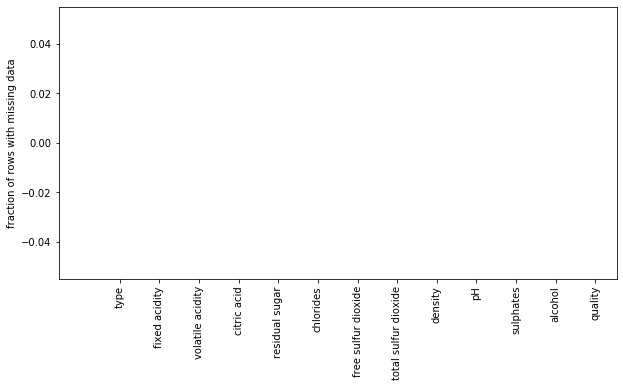

In [5]:
null_counts = dataset.isnull().sum()/len(dataset)
plt.figure(figsize=(10,5))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

##### Eliminando Outliers

A variável alcohol contém alguns valores descrepantes para muito acima da maioria dos valores desta variável, por isso foram eliminados para evitar que gerem ruidos nos modelos.

outras variáveis como residual sugar, fixed acidity, volatile acidity, citric acid entre outras, foi aplicado uma função logaritmica para melhorar a distribuição dos valores das mesmas.

In [6]:
lista = ['128.933.333.333.333', '923.333.333.333.333','956.666.666.666.667','953.333.333.333.333',
            '963.333.333.333.333','973.333.333.333.333','120.666.666.666.667','100.333.333.333.333',
            '110.666.666.666.667','135.666.666.666.667','101.333.333.333.333','109.666.666.666.667',
            '105.666.666.666.667','117.333.333.333.333','112.666.666.666.667','123.333.333.333.333',
            '113.333.333.333.333','113.666.666.666.667','109.333.333.333.333','105.333.333.333.333',
            '114.333.333.333.333','100.333.333.333.333','114.666.666.666.667','116.333.333.333.333',
            '104.666.666.666.667','131.333.333.333.333']


df = dataset[~dataset['alcohol'].isin(lista)]

##### Distribuição da variável target

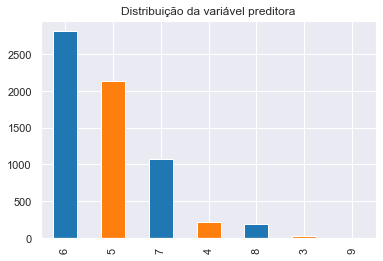

In [7]:
target_counts = df.quality.value_counts()

sns.set(style="darkgrid")
target_counts.plot(kind='bar',title='Distribuição da variável preditora', color=['#1F77B4', '#FF7F0E'])

Como podemos ver no gráfico acima, temos umm desbalanceamento entre as classes, onde claramente podemos ver que os valores mais presentes estão entre 5 e 7. 

##### Grafico de densidade

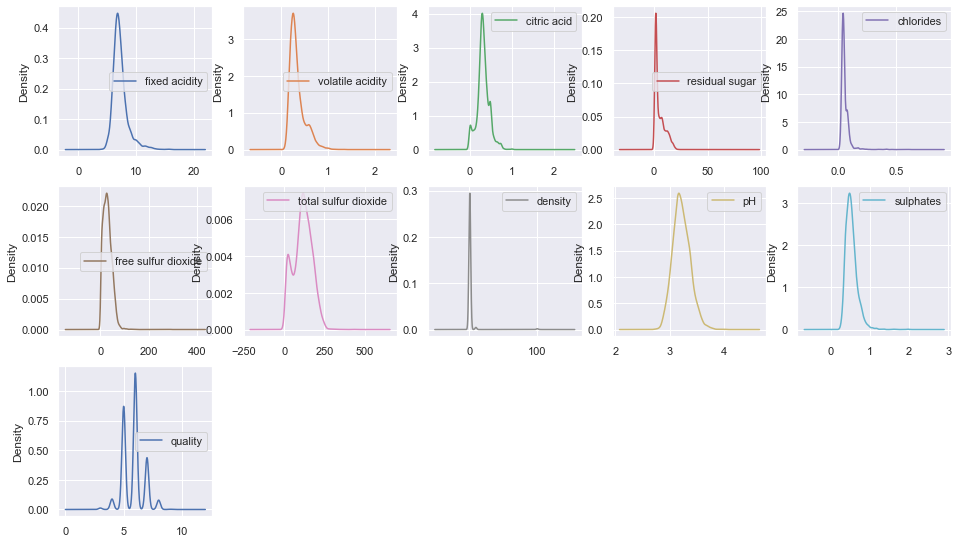

In [8]:
df.plot(kind='density',subplots=True,layout=(5,5), sharex=False, figsize=(16,16))
plt.show()

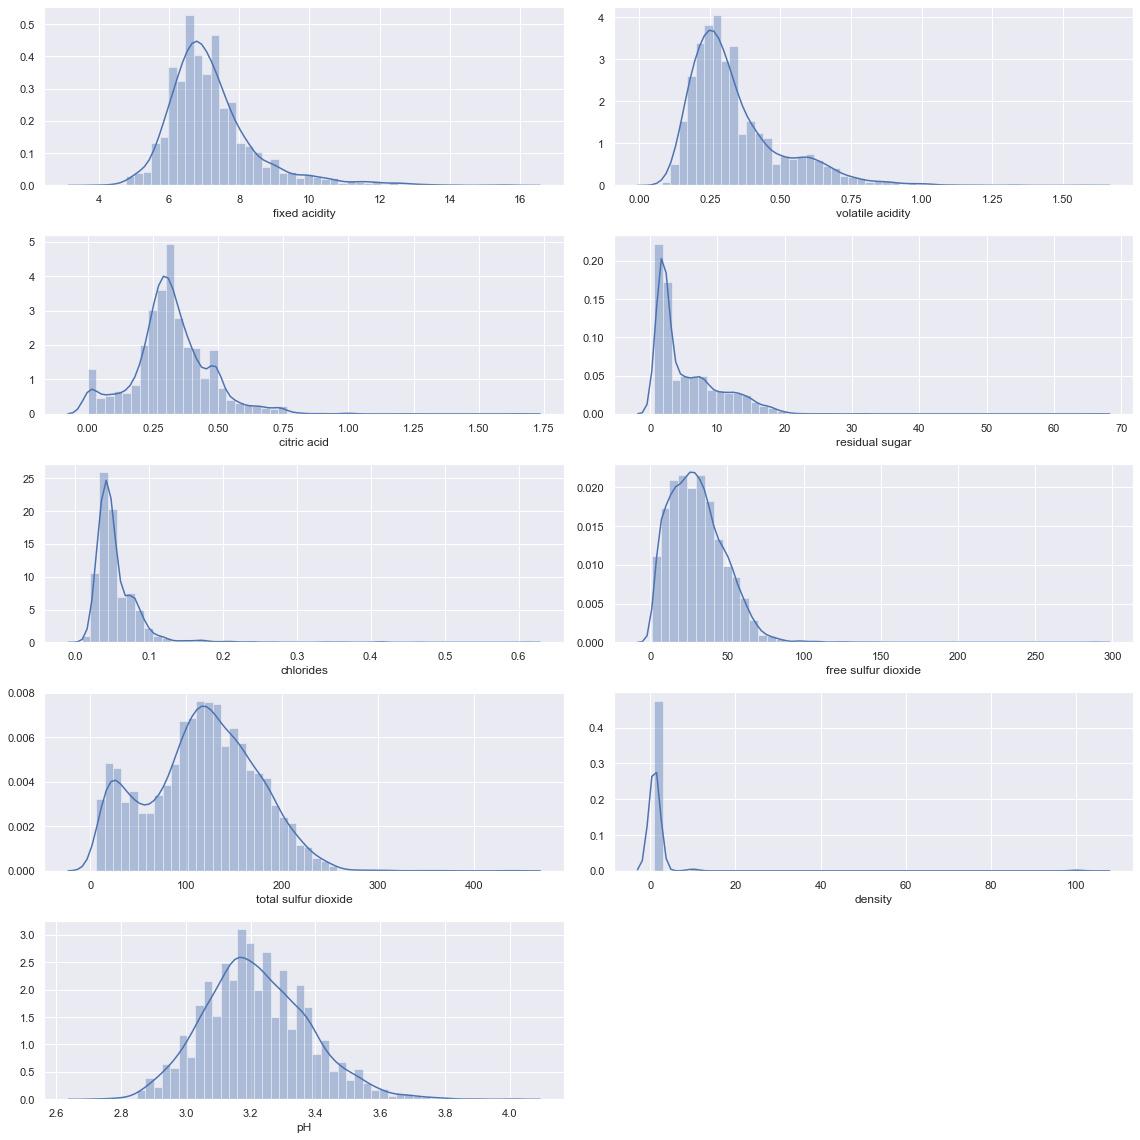

In [9]:
fig = plt.figure(figsize=(16,16))

p1 = fig.add_subplot(521)
p1 = sns.distplot(df['fixed acidity'])

p2 = fig.add_subplot(522)
p2 = sns.distplot(df['volatile acidity'])

p3 = fig.add_subplot(523)
p3 = sns.distplot(df['citric acid'])

p4 = fig.add_subplot(524)
p4 = sns.distplot(df['residual sugar'])

p5 = fig.add_subplot(525)
p5 = sns.distplot(df['chlorides'])

p6 = fig.add_subplot(526)
p6 = sns.distplot(df['free sulfur dioxide'])

p7 = fig.add_subplot(527)
p7 = sns.distplot(df['total sulfur dioxide'])

p8 = fig.add_subplot(528)
p8 = sns.distplot(df['density'])

p9 = fig.add_subplot(529)
p9 = sns.distplot(df['pH'])

#p10 = fig.add_subplot(530)
#p10 = sns.distplot(df['sulphates'])

#p11 = fig.add_subplot(531)
#p11 = sns.distplot(df['alcohol'])

plt.tight_layout()
fig = plt.gcf()

Vejamos a qualidade dos vinhos distribuidos na variável tipo (vermelho ou branco). Como podemos ver temos vinhos com melhor avaliados do tipo branco.

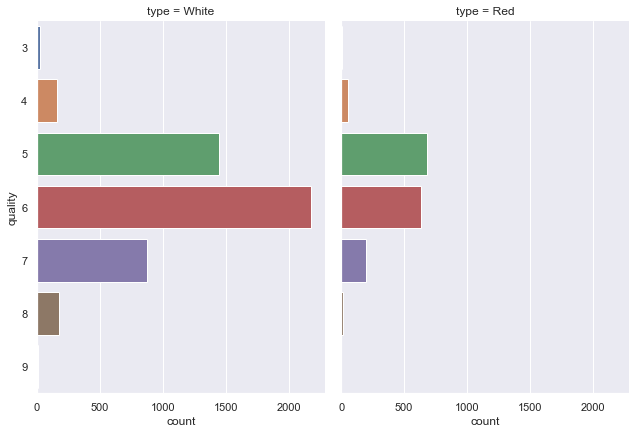

In [10]:
g = sns.catplot(y="quality", col="type", data=df, kind="count", height=6, aspect=.75);

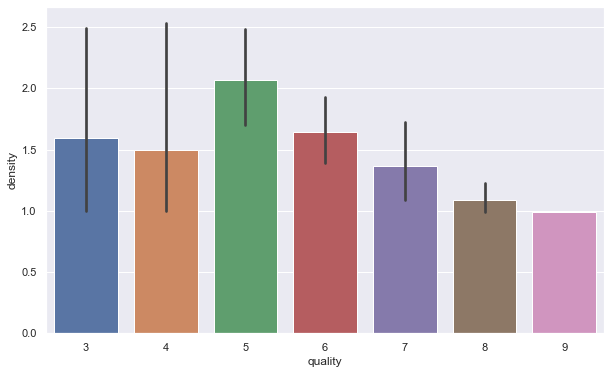

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = df)

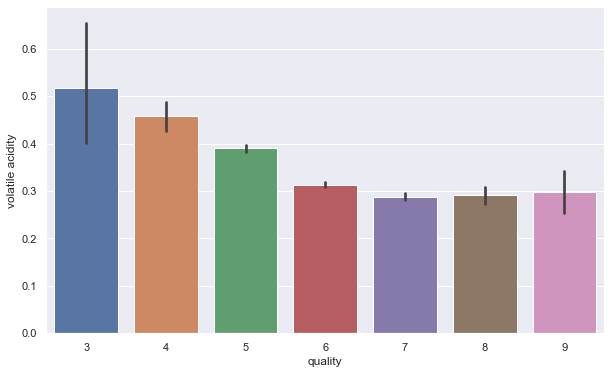

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df)

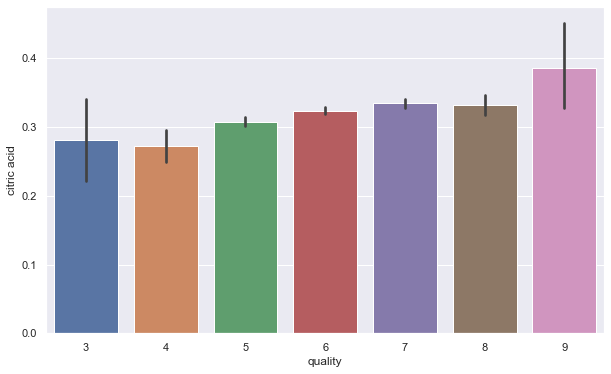

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

In [14]:
cols = ['residual sugar','fixed acidity','volatile acidity','citric acid','residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide']

for c in cols:
    df[c] = round(np.log1p(df[c]),3)

Obs.: Foi utilzado a função de logaritmo com ponto flutuante no casos acima, pois em alguns casos eram gerados valores negativos, e como solução de contorno foi aplicado o log1p pois calcula o logaritmo natural acrescido de uma unidade.

##### Transformação da variável "Type" para numérica.

In [15]:
df['type'] = pd.get_dummies(df['type'])

##### Gráfico de correlação

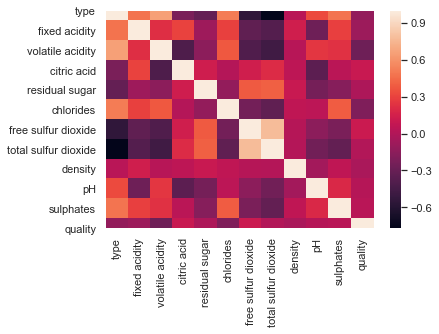

In [16]:
sns.heatmap(df.corr())
plt.show()

##### Alterando variável target para binária

Como vimos no gráfico de distribuição da variável target, temos um desbalanceamento entre as classes do dataset. 
Isso pode dificultar chegarmos a um modelo minimamente satisfatório, por isso a variável target foi alterada para binária.

In [17]:
bins = (1, 6.5, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df['quality'] = df['quality'].astype('str')
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    5190
1    1267
Name: quality, dtype: int64

In [18]:
df['type'] = df['type'].astype('float64')
df['fixed acidity'] = df['fixed acidity'].astype('float64')
df['volatile acidity'] = df['volatile acidity'].astype('float64')
df['citric acid'] = df['citric acid'].astype('float64')
df['residual sugar'] = df['residual sugar'].astype('float64')
df['chlorides'] = df['chlorides'].astype('float64')
df['free sulfur dioxide'] = df['free sulfur dioxide'].astype('float64')
df['total sulfur dioxide'] = df['total sulfur dioxide'].astype('float64')
df['density'] = df['density'].astype('float64')
df['pH'] = df['pH'].astype('float64')
df['sulphates'] = df['sulphates'].astype('float64')
df['alcohol'] = df['alcohol'].astype('float64')

##### Divisão dos dados entre treino, teste e validação

In [19]:
y = df.quality
x = df.drop('quality',axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, random_state = 10)

##### Modelos

Para o treinamento dos modelos foram escolhidos algoritmos baseados em árvores pois a relação entre as variáveis dependente e indepente não apresenta alta linearidade. 

Foi escolhido random forest pela versatilidade e poder de lidar com dados de muitas dimensões.

Além de algorítmos que convertem aprendizado fraco em aprendizado forte (boosting) combinando previsões de várias pequenas árvores.

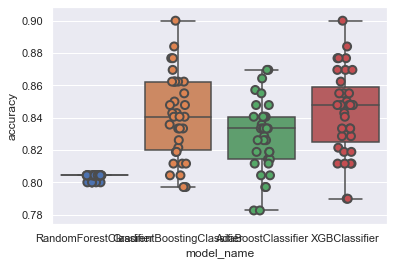

In [20]:
models = [
    RandomForestClassifier(n_estimators=450, max_depth=2, random_state=3),
    GradientBoostingClassifier(max_depth=2, n_estimators=450),
    AdaBoostClassifier(n_estimators=450),
    XGBClassifier()
]
CV = 35
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy',  cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
AdaBoostClassifier            0.828566
GradientBoostingClassifier    0.841369
RandomForestClassifier        0.803602
XGBClassifier                 0.843242
Name: accuracy, dtype: float64

In [22]:
model = XGBClassifier(max_depth=10, n_estimators=450)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

##### Avaliação do modelo

Nesta etapa, após o treinamento dos modelos faremos a avaliação do mesmo, observando métricas como Score, Recall, Precision, F1-Score e Kappa. 

Observaremos todas essas métricas uma vez que podemos ter um modelo com um bías e se levarmos somente uma métrica como medida de avaliação do modelo, podemos nos equivocar na sua real precisão.

Todos as métricas vão de 0 a 1, lembrando que quanto mais próximo de 1 melhor.

In [23]:
def metrics(X_test, y_test, metric_type):
    test_preds = model.predict(X_test)

    test_score = round(model.score(X_test, y_test),2)
    test_rec_s = round(recall_score(y_test, test_preds), 2)
    test_prec_s = round(precision_score(y_test, test_preds, 2))
    test_f1 = round(f1_score(y_test, test_preds), 2)
    test_kappa = round(cohen_kappa_score(y_test, test_preds), 2)

    print("Métricas do modelo XGBoost no dataset de", metric_type)
    print('\n')
    print('score: ', test_score)
    print('recall: ', test_rec_s)
    print('prec: ', test_prec_s)
    print('f1: ', test_f1)
    print('kappa: ', test_kappa)
    print('')

In [24]:
metrics(X_test, y_test, "Teste"), metrics(X_valid, y_valid, "Validação")

Métricas do modelo XGBoost no dataset de Teste


score:  0.88
recall:  0.61
prec:  1.0
f1:  0.66
kappa:  0.59

Métricas do modelo XGBoost no dataset de Validação


score:  0.89
recall:  0.59
prec:  1.0
f1:  0.68
kappa:  0.61



(None, None)

##### Matriz de confusão

A matriz de confusão nos fornece a visão de quanto o modelo errou e acertou.

Podemos notar que a maior parte dos erros esta relacionado a classe 1, pois temos uma quantidade menor de dados nesta classe, 1267 contra 5190 na classe 0, observando precision, recall e f1-score de cada classe podemos comprovar o comportamento de que o modelo aprendeu mais a classe com mais observações.

In [25]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[309  18]
 [ 30  47]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       327
           1       0.72      0.61      0.66        77

    accuracy                           0.88       404
   macro avg       0.82      0.78      0.79       404
weighted avg       0.88      0.88      0.88       404



##### Curva ROC dataset de teste

A curva roc (receiver operating characteristic) nos ajuda a visualizar o quão bom pode ser um modelo de classificação binária. Temos duas métricas para analisar, a taxa de Falso positivo e taxa de verdadeiro positivo.

A idéia é ter um auc cobrindo a maior parte possível do gráfico, e ter um valor mais próximo de 1, no nosso caso temos um auc de 0.82, o que nos mostra que nosso modelo não é excelente.

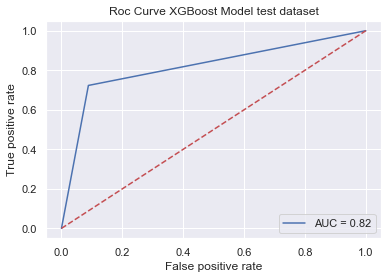

In [26]:
false_positive_rate, true_positive_rate,thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(false_positive_rate,true_positive_rate)

plt.title('Roc Curve XGBoost Model test dataset')
plt.plot(false_positive_rate,true_positive_rate,'b', label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

##### Features mais importantes

Aqui temos as features elencadas como mais importantes pelo nosso modelo, podemos ver que a mais importante delas é o teor alcólico, seguido pelas demais variáveis que tem importância muito próxima.

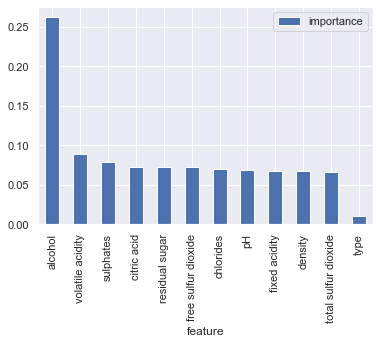

In [27]:
importances = pd.DataFrame({'feature':X_test.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

Nosso dataset apesar de ter sido modificado sua variável target para binária, sofreu poucas alterações nas demais features, não havia muito espaço para criação de novas features, talvez em um próximo passo podemos desenvolver um modelo mais robusto talvez pensar em usar técnicas de undersampling ou oversampling para suprir o desbalanceamento das classes preditoras, bem como modelos com suporte a classes desbalanceadas. 